<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/2_DM_Preproccesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Πώς να προετοιμάσετε τα δεδομένα σας για αλγορίθμους μηχανικής μάθησης στη Python με Scikit-Learn


Η προεπεξεργασία των δεδομένων, όπως είδαμε, είναι μια προαπαιτούμενη διεργασία. Ανάλογα με τη δομή του προβλήματος, προεπεξεργαζόμαστε τα δεδομένα έτσι ώστε να είναι κατάλληλα για τους αλγόριθμους μηχανικής μάθησης που σκοπεύουμε να χρησιμοποιήσουμε.Οι μετασχηματισμοί υπολογίζονται με τέτοιο τρόπο ώστε να μπορούν να εφαρμοστούν στα δεδομένα εκπαίδευσης και σε τυχόν  μελλοντικά δείγματα δεδομένων. 

Συνήθως δημιουργούμε  προβολές του συνόλου των δεδομένων μας, χρησιμοποιώντας διαφορετικούς μετασχηματισμούς, κατάλληλες για διαφορετικούς αλγορίθμους μηχανικής μάθησης. 


![scikit-laern logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

To [scikit-learn](https://scikit-learn.org/stable/index.html), το οποίο και θα χρησιμοποιήσουμε, είναι μια open source συλλογή από απλά και αποτελεσματικά εργαλεία για την εξόρυξη και την ανάλυση δεδομένων, χτισμένη σε NumPy, SciPy και matplotlib. Μεταξύ άλλων, περιλαμβάνει κάποιες πληροφορίες σχετικά με τον τρόπο χρήσης διαφορετικών μεθόδων προεπεξεργασίας. Μπορείτε να ανατρέξετε περαιτέρω στο [API preprocess](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).


Σε αυτό το Notebook θα παρουσιαστούν 4 διαφορετικές και αυτόνομες μέθοδοι προεπεξεργασίας δεδομένων που μπορούν να χρησιμοποιηθούν για αλγορίθμους μηχανικής μάθησης.

![UCI ML Logo](http://archive.ics.uci.edu/ml/assets/logo.gif "UCI Machine Learning Repository")

Το dataset που θα χρησιμοποιήσουμε είναι το Pima Indian diabetes απο το [UCI Machine Learning Repository], το διασημότερο αποθετήριο datasets για Machine Learning.(http://archive.ics.uci.edu/ml/index.php).

Το "Pima Indians Diabetes data set (ή Pima)" περιλαμβάνει 768 δείγματα από γυναίκες άνω των 21 με καταγωγή από τους ινδιάνους Pima (Pima people). Με βάση 8 βιολογικά χαρακτηριστικά προσπαθούμε να αποφασίσουμε αν ένα άτομο είναι διαβητικό ή όχι.

![1889 Photograph shows half-length portrait of two Pima Indians, facing front, wearing bead necklaces.](https://i.pinimg.com/236x/60/05/76/600576905d4ad5bb1a9c3e3387b397ca--pima-indians-native-american-indians.jpg "1889 Photograph shows half-length portrait of two Pima Indians, facing front, wearing bead necklaces.")

Αυτό είναι ένα δυαδικό πρόβλημα ταξινόμησης όπου όλα τα χαρακτηριστικά είναι αριθμητικά και έχουν διαφορετικές κλίμακες. Το pima dataset αποτελεί ένα καλό παράδειγμα για το πώς ένα σύνολο δεδομένων μπορεί να επωφεληθεί από την προεπεξεργασία.

Τα **αρχικά στάδια** είναι όμοια για οποιαδήποτε μέθοδο προεπεξεργασίας και να χρησιμοποιήσουμε και είναι τα εξής: 

1. "Φορτώνουμε" το σύνολο δεδομένων από μια διεύθυνση URL ή απευθείας διαβάστε το αν ανήκει στο toy datasets του scikit-learn.
2. Εφαρμόζουμε ένα μετασχηματισμό προεπεξεργασίας στις μεταβλητές εισόδου.
3. Συγκεντρώνουμε τα δεδομένα για να δείξουμε την αλλαγή. 
4. Διαχωρίζουμε το σύνολο δεδομένων στις μεταβλητές εισόδου και εξόδου για μηχανική μάθηση.

Το Scikit-learn έχει για κάποια datasets (ονομάζονται toy datasets), μεταξύ των οποίων και το pima καθώς και έτοιμες συναρτήσεις για να τα φορτώνουμε χωρίς να χρειαστεί να διαβάσουμε text file. 

### Φόρτωση dataset


In [ ]:
# Load CSV using Pandas from URL

import pandas as pd
import scipy as sc
import numpy as np
from sklearn.preprocessing import MinMaxScaler

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Because thε CSV doesn't contain any header, we add column names using the description from the original dataset website
  # Number of times pregnant / Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  # Diastolic blood pressure (mm Hg) / Triceps skin fold thickness (mm)
  # 2-Hour serum insulin (mu U/ml) / Body mass index (weight in kg/(height in m)^2)
  # Diabetes pedigree function / Age (years)

names = ['NumberPreg', 'PlasGlucconce', 'BloodPres', 'SkinThick', 'TwoHourSerIns', 'BMI', 'DiPedFunc', 'Age', 'Class']
dataset = pd.read_csv(url, names=names)

# Check the shape of the data: we have 768 rows and 9 columns:
# the first 8 columns are features while the last one
# is the supervised label (1 = has diabetes, 0 = no diabetes)

print(dataset.shape)
array = dataset.values

(768, 9)


In [ ]:
# Visualise a table with the first rows of the dataset, to
# better understand the data format
dataset.head()

,NumberPreg,PlasGlucconce,BloodPres,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# separate array into input and output components
# X: Features Y: Labels
X = array[:,0:8]
Y = array[:,8]

### Κανονικοποίηση

In [ ]:
# Normalization
# display data before and after normalization
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
np.set_printoptions(precision=3)

# data
print()
print(X[0:5,:])

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# transformed data
print(normalizedX[0:5,:])


[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


### Πίνακας συσχέτισης δεδομένων

Ο πίνακας συσχέτισης είναι ένα σημαντικό εργαλείο για την κατανόηση της συσχέτισης μεταξύ των διαφόρων χαρακτηριστικών. 
Οι τιμές κυμαίνονται από -1 έως 1 και όσο πιο κοντά είναι στη τιμή 1, τόσο μεγαλύτερη είναι η σχέση μεταξύ δύο χαρακτηριστικών.
Ας υπολογίσουμε τη συσχέτιση μεταξύ των χαρακτηριστικών για το σύνολο δεδομένων μας.



In [ ]:
corr = dataset.corr()
corr

,NumberPreg,PlasGlucconce,BloodPres,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,Class
NumberPreg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlasGlucconce,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Μόνο από τον πίνακα και χωρίς γνώσεις ιατρικής μπορούμε να αποφανθούμε ότι όσο μεγαλύτερη είναι η ηλικία ή ο ΔΜΣ ενός ασθενούς, 
τόσο μεγαλύτερες πιθανότητες έχει ο ασθενής να αναπτύξει διαβήτη τύπου 2.

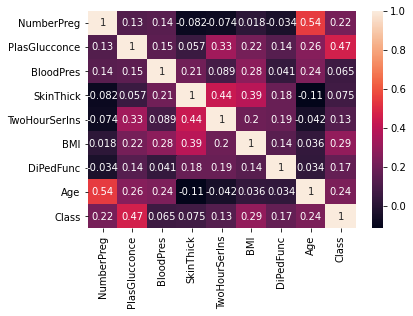

In [ ]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

### Προεπεξεργασία δεδομένων

Αφού εισάγαμε τα δεδομένα και κάναμε μια πρώτη επισκόπηση και τα φέραμε στη σωστή μορφοποίηση, περνάμε στο επόμενο στάδιο, αυτό της προεπεξεργασίας (data preprocessing). Σε πολλά προβλήματα ταξινόμησης (και machine learning γενικότερα) η προεπεξεργασία είναι ένα πολύ σημαντικό κομμάτι (και συχνά πολύ χρονοβόρο) ολόκληρης της διαδικασίας το οποίο όμως συχνά έχει πολύ μεγάλο αντίκτυπο στην επίδοση του συστήματος. 

Τα βήματα προεπεξεργασίας στοχεύουν:
* Στην αφαίρεση ή αντικατάσταση απουσιάζουσων τιμών από το dataset.
* Στη μετατροπή των κατηγορικών μεταβλητών κατάλληλα ώστε να μπορούν να τους διαχειριστούν αλγόριθμοι μηχανικής μάθησης.
* Στην επιλογή ή εξαγωγή των κατάλληλων χαρακτηριστικών για το μοντέλο μας.

#### Απουσιάζουσες τιμές χαρακτηριστικών

Επειδή τα datasets δημιουργούνται από μετρήσεις ή αντικείμενα του πραγματικού κόσμου, δεν είναι σπάνιο να υπάρχουν απουσιάζουσες τιμές κάποιων χαρακτηριστικών σε έναν αριθμό δειγμάτων. Ωστόσο η είσοδος στους αλγόριθμους ΜΜ πρέπει να είναι πλήρης. 


In [ ]:
from io import StringIO

csv_data = '''A,B,C,D \n 1.0,2.0,3.0,4.0 \n 5.0,6.0,,8.0 \n 10.0,11.0,12.0,'''
print(csv_data)

df = pd.read_csv(StringIO(csv_data))
print(df)

A,B,C,D 
 1.0,2.0,3.0,4.0 
 5.0,6.0,,8.0 
 10.0,11.0,12.0,
      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


Με την StringIO διαβάζουμε σε ένα dataframe από ένα string σαν να ήταν CSV αρχείο στο δίσκο. Παρατηρούμε ότι στο CSV λείπουν δύο τιμές τις οποίες το dataframe αντιλαμβάνεται και αντικαθιστά με "NaN" ("Not A Number").

Μια στρατηγική θα ήταν να αφαιρέσουμε τα δείγματα (γραμμές) που έχουν χαρακτηριστικά με απουσιάζουσες τιμές ή παρόμοια τα χαρακτηριστικά αν σε κάποια δείγματα απουσιάζουν


In [ ]:
df.isnull().any() #Check for null values

A     False
B     False
C      True
D      True
dtype: bool

In [ ]:
df.dropna(axis=0) # κρατάμε μόνο τα δείγματα με αριθμητικές τιμές

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(axis=1) # κρατάμε μόνο τα χαρακτηριστικά με αριθμητικές τιμές

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
#df.dropna(inplace=True) # Drop null values

(η μέθοδος dropna έχει πολλά ακόμη [options](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html))

Σημειώστε ότι αυτή μεθοδολογία είναι η μόνη μορφή προεπεξεργασίας που καλύτερο είναι να γίνει **πριν διαχωρίσουμε σε train και test**. Aν έχουμε κάνει το διαχωρισμό θα πρέπει οποιοδήποτε χαρακτηριστικό (στήλη) αφαιρέσουμε στο ένα, να το αφαιρέσουμε και στο άλλο.

Μπορεί αυτή η προσέγγιση να είναι μοιάζει απλή ωστόσο ειδικά αν απουσιάζουν πολλές τιμές συνήθως δεν θέλουμε να θυσιάσουμε δεδομένα (δείγματα ) ούτε να αφαιρέσουμε χαρακτηριστικά που μπορεί να περιλαμβάνουν σημαντική πληροφορία για το διαχωρισμό των κλάσεων.

Πρακτικά συνήθως χρησιμοποιούμε το μετασχηματιστή “[Imputer](http://scikit-learn.org/stable/modules/impute.html)” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή (συνεχείς μεταβλητές) ή την πιο συχνή τιμή (κατηγορικές μεταβλητές) του χαρακτηριστικού στο train set. 


Αν θεωρήσουμε ότι το df είναι το training set τότε:


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')

imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)

imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

Αν τώρα έχουμε ένα test set με missing values οι τιμές θα αντικατασταθούν με τις μέσες / πιο συχνές τιμές που έχουν υπολογιστεί στο **train set**.

In [ ]:
csv_data = '''A,B,C,D \n 3.0,4.0,,1.0 \n 5.0,2.0,10.0,6.0'''

test_df = pd.read_csv(StringIO(csv_data))
print(test_df)

imputed_test_data = imr.transform(test_df.values)

imputed_test_data

     A    B     C   D 
0  3.0  4.0   NaN  1.0
1  5.0  2.0  10.0  6.0


array([[ 3. ,  4. ,  7.5,  1. ],
       [ 5. ,  2. , 10. ,  6. ]])

#### Αριθμητικά και κατηγορικά χαρακτηριστικά
Σε κάποιες περιπτώσεις τα datasets περιέχουν εκτός από αριθμητικά και κατηγορικά χαρακτηριστικά στη μορφή string. Για παράδειγμα:

In [ ]:
# Όνομα Ηλικία Βάρος Κάτοικος
MixedType = np.array([
    ['John', 25, 63.2, 'UK'],
    ['Maria', 62, 54.3, 'US'],
    ['Nick', 18, 70.3, 'US'],
])
print(MixedType)

[['John' '25' '63.2' 'UK']
 ['Maria' '62' '54.3' 'US']
 ['Nick' '18' '70.3' 'US']]


Για να μπορέσει ο αλγόριθμος να λειτουργήσει, θα μπορούσε κανείς να σκεφτεί να αντικαταστήσει κάθε διαφορετική τιμή κάθε κατηγορικού χαρακτηριστικού με μια αριθμητική τιμή. Στο προηγούμενο παράδειγμα να θέσει John=0, Maria=1, Nick=2 και Europe=0, US=1. Αυτό όμως είναι λάθος γιατί θεωρεί ότι το σύνολο τιμών των δύο κατηγορικών μεταβλητών είναι διατεταγμένο (ordered) κάτι που προφανώς δεν ισχύει και θα οδηγήσει σε λάθη τον ταξινομητή.

Μια λύση είναι να μετατρέψουμε κάθε κατηγορικό χαρακτηριστικό με m τιμές σε m binary χαρακτηριστικά από τα οποία μόνο ένα είναι ενεργό κάθε φορά:

In [ ]:
# μετατρέπουμε σε dataframe και τυπώνουμε
mtdf = pd.DataFrame(MixedType)
print(mtdf)

# Οι στήλες 1 και 4 έχουν κατηγορικές μεταβλητές.
# Με την "get_dummies" κάνουμε τη μετατροπή σε binary χαρακτηριστικά που περιγράψαμε
dummies = pd.get_dummies(mtdf, columns=[0,3])
print(dummies)

# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
np_dummies = dummies.apply(pd.to_numeric).values
#print(np_dummies)

       0   1     2   3
0   John  25  63.2  UK
1  Maria  62  54.3  US
2   Nick  18  70.3  US
    1     2  0_John  0_Maria  0_Nick  3_UK  3_US
0  25  63.2       1        0       0     1     0
1  62  54.3       0        1       0     0     1
2  18  70.3       0        0       1     0     1


### Οπτικοποίηση του συνόλου δεδομένων

Η απεικόνιση των δεδομένων είναι ένα σημαντικό βήμα της ανάλυσης δεδομένων. Με μια γραφική απεικόνιση των δεδομένων έχουμε καλύτερη κατανόηση των διαφόρων χαρακτηριστικών της κατανομής των τιμών: για παράδειγμα στο pima dataset μπορούμε να καταλάβουμε ποια είναι η μέση ηλικία των ανθρώπων ή ο μέσος ΔΜΣ κλπ. 

Θα μπορούσαμε φυσικά να περιορίστουμε στην απεικόνιση του πίνακα συσχέτιση, αλλά θα μπορούσαμε να χάσουμε σημαντικά πράγματα που μπορεί να επηρεάσουν την ακρίβεια του μοντέλου μας.

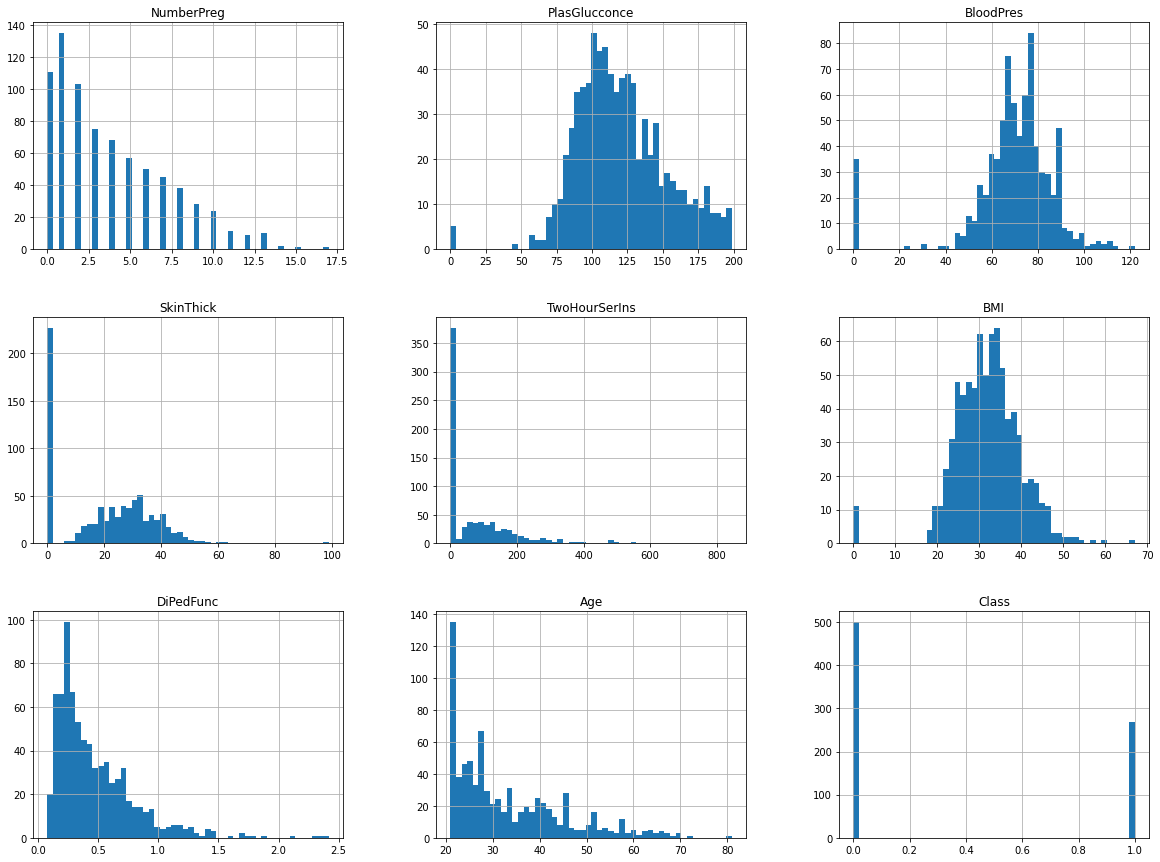

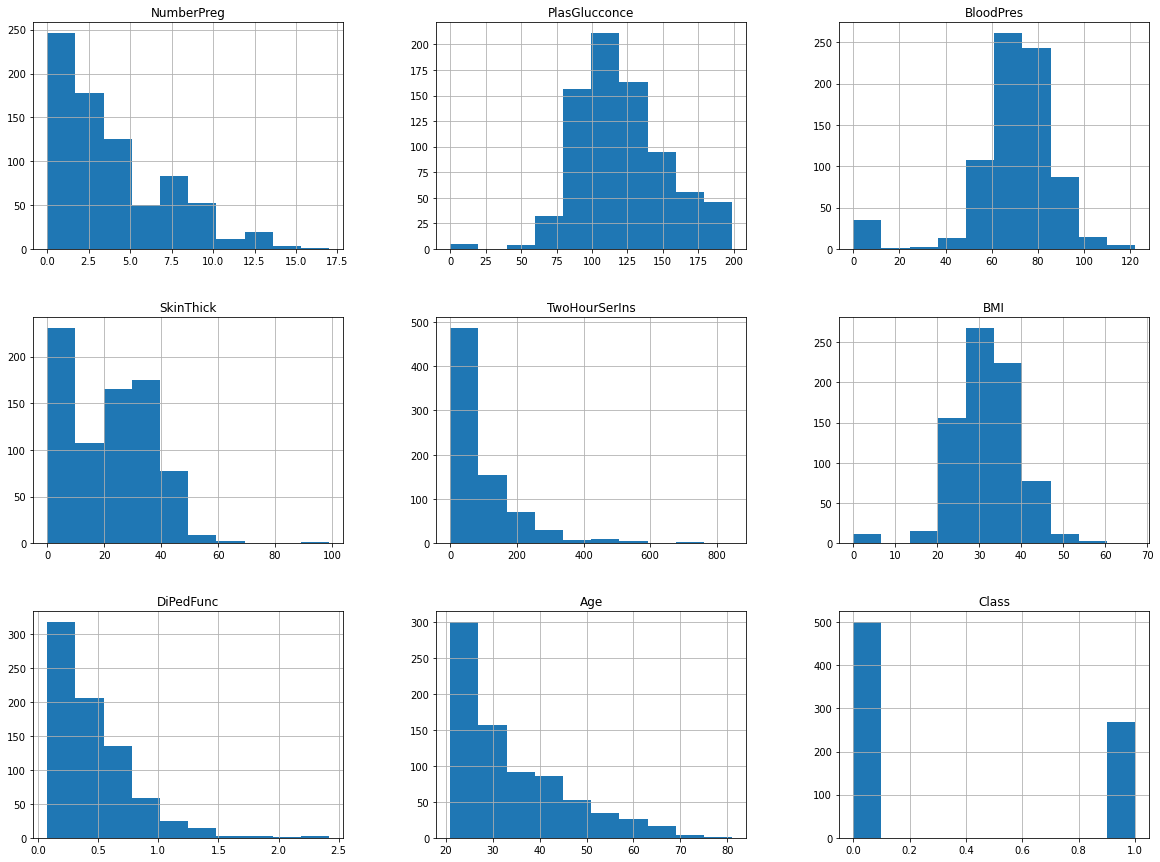

In [ ]:
import matplotlib.pyplot as plt
#Binning 50
dataset.hist(bins=50, figsize=(20, 15))
plt.show()
#Binning 20
import matplotlib.pyplot as plt
dataset.hist(bins=10, figsize=(20, 15))
plt.show()


Έχουμε παρατηρήσει από την προηγούμενη ανάλυση ότι ορισμένοι ασθενείς έχουν ελλιπή στοιχεία για ορισμένα από τα χαρακτηριστικά π.χ. BMI=0, BloodPress=0. Οι αλγόριθμοι μηχανικής μάθησης δεν λειτουργούν πολύ καλά όταν τα δεδομένα λείπουν, οπότε πρέπει να βρούμε μια λύση για να "καθαρίσουμε" τα δεδομένα που έχουμε. 

Η ευκολότερη επιλογή θα μπορούσε να είναι η διαγραφή όλων των ασθενών με κενές/μηδενικές τιμές, αλλά με αυτόν τον τρόπο θα εξαλείψαμε πολλά σημαντικά δεδομένα. Μια άλλη επιλογή είναι να υπολογίσουμε τη ενδιάμεση τιμή για μια συγκεκριμένη στήλη και να αντικαταστήσουμε αυτήν την τιμή όπου (στην ίδια στήλη) έχουμε μηδέν ή null. Ας δούμε πώς να εφαρμόσουμε αυτή τη δεύτερη μέθοδο.


In [ ]:
# Το 0 για στήλες όπως η 'Number of times pregnant' έχει ουσία, άρα δεν το αντικαθιστούμε.

# Calculate the median value for BMI
median_bmi = dataset['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataset['BMI'] = dataset['BMI'].replace(to_replace=0, value=median_bmi)

# Calculate the median value for BloodP
median_bloodp = dataset['BloodPres'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
dataset['BloodPres'] = dataset['BloodPres'].replace(to_replace=0, value=median_bloodp)

# Calculate the median value for DiPedFunc(Diabetes pedigree function)
median_DiPedFunc = dataset['DiPedFunc'].median()
# Substitute it in the DiPedFunc column of the
# dataset where values are 0
dataset['DiPedFunc'] = dataset['DiPedFunc'].replace(to_replace=0, value=median_DiPedFunc)

# Calculate the median value for SkinThick
median_skinthick = dataset['SkinThick'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
dataset['SkinThick'] = dataset['SkinThick'].replace(to_replace=0, value=median_skinthick)

# Calculate the median value for TwoHourSerIns
median_twohourserins = dataset['TwoHourSerIns'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
dataset['TwoHourSerIns'] = dataset['TwoHourSerIns'].replace(to_replace=0, value=median_twohourserins)



### Διαχωρισμός του συνόλου δεδομένων

Πρωτού φτιάξουμε το μοντέλο, χωρίζουμε τα δεδομένα μας, τυχαία, σε ένα σύνολο εκπαίδευσης και σε ένα σύνολο ελέγχου.

Παρακάτω βλέπουμε ένα παράδειγμα διαχωρισμού του dataset με αναλογία 60-40:


![data split](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_6_cfpjpr.png)


Χρησιμοποιούμε το train set για να εκτιμούμε και να βελτιώνουμε το μοντέλο της μηχανικής μάθησης (π.χ. ένας ταξινομητής για το pima dataset) κατά την ανάπτυξή του. 

Δεν επιτρέπεται σε κανένα σημείο η χρήση των δεδομένων test για την εκπαίδευση του μοντέλου.

Χρησιμοποιούμε μετά το test set για να αξιολογήσουμε στατιστικά την απόδοση του μοντέλου μας.

Το sklearn έχει τη συνάρτηση train_test_split() που ανακατεύει τυχαία τα δείγματα και τα διαχωρίζει σε train και test με βάση κάποιο ποσοστό που θα της δώσουμε.

In [ ]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["Class"].copy()
train_set = train_set.drop("Class", axis=1)

test_set_labels = test_set["Class"].copy()
test_set = test_set.drop("Class", axis=1)

### Κλιμάκωση χαρακτηριστικών

Οι περισσότεροι από τους αλγόριθμους μηχανική μάθησης δεν λειτουργούν πολύ καλά αν τα χαρακτηριστικά έχουν διαφορετικό σύνολο τιμών. Στην περίπτωσή μας, για παράδειγμα, το χαρακτηριστικό ηλικία κυμαίνεται από 20 έως 80 ετών, ενώ ο αριθμός των περιπτώσεων που μια ασθενής ήταν έγκυος κυμαίνεται από το 0 έως το 17 οπότε πρέπει να εφαρμόσουμε έναν σωστό μετασχηματισμό.

Όταν τα δεδομένα  αποτελούνται από χαρακτηριστικά με διαφορετικές κλίμακες, πολλοί αλγόριθμοι μηχανικής μάθησης μπορούν να
επωφεληθούν από την ανακατάταξη (rescaling) των χαρακτηριστικών έτσι ώστε όλα να έχουν τις ίδιες κλίμακες.

Συχνά αυτό αναφέρεται ως κανονικοποίηση (normalization) και τα χαρακτηριστικά συχνά μετατρέπονται σε κλίμακα μεταξύ 0 και 1. 
Αυτό είναι χρήσιμο για τους αλγόριθμους βελτιστοποίησης που χρησιμοποιούν, στον πυρήνα τους, μεθόδους όπως η φθίνουσα κλίσης (gradient descent). 
Είναι επίσης χρήσιμο για τους αλγορίθμους με βάρη εισόδου όπως η παλινδρόμηση και τα νευρωνικά δίκτυα και αλγόριθμοι που χρησιμοποιούν μέτρα απόστασης όπως ο K-Nearest Neighbours.

Η κλάση MinMaxScaler του scikit-learn χρησιμοποιείται για τον σκοπό αυτόν.



In [ ]:
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()

scaler.fit(train_set)

train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

### Κλιμάκωση τιμών

In [ ]:
df = pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


### Επιλογή και εκπαίδευση μοντέλου

Δεν είναι δυνατόν να γνωρίζουμε εκ των προτέρων ποιος αλγόριθμος θα λειτουργήσει καλύτερα με το σύνολο δεδομένων μας. Πρέπει να συγκρίνουμε μερικούς και να επιλέξουμε αυτόν με το "καλύτερο αποτέλεσμα". 

Για να συγκρίνουμε πολλούς αλγορίθμους με το ίδιο σύνολο δεδομένων, χρησιμοποιούμε το model_selection του sklearn. Δημιουργούμε μια λίστα αλγορίθμων και στη συνέχεια τα βαθμολογούμε με την ίδια μέθοδο σύγκρισης. Στο τέλος επιλέγουμε αυτό με το καλύτερο αποτέλεσμα.



In [ ]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))


In [ ]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

#### Ρύθμιση υπερπαραμέτρων με διασταυρούμενη επικύρωση (Cross Validation)
Ένας προφανής τρόπος να βρούμε τη βέλτιστη τιμή του k, να πραγματοποιήσουμε δηλαδή επικύρωση του μοντέλου, είναι ο ακόλουθος. Για k=1 μέχρι k=κάποιο n, κάνουμε fit τον ταξινομητή στο train set και μετράμε την απόδοση στο test set. Ο ταξινομητής με k που δίνει το μικρότερο σφάλμα ταξιμόνόμησης σύμφωνα με κάποιο κριτήριο (εδώ η πιστότητα) στο test set θα είναι ο βέλτιστος. 

Όμως, αν ακολουθήσουμε αυτή τη στρατηγική, ουσιαστικά κάνουμε υπερεκπαίδευση, καθώς χρησιμοποιούμε το test set ως training set, δηλαδή βελτιστοποιούμε κάποιο κριτήριο σφάλματος πάνω στο test set. Αυτό μπορεί να είναι επιβλαβές για την ικανότητα γενίκευσης του ταξινομητή: το test set χρησιμεύει μόνο για την τελική εκτίμηση της απόδοσης του ταξινομητή.

Για να ακολουθήσουμε σωστά το πρωτόκολλο, αυτό που πρέπει να κάνουμε είναι να χρησιμοποιήσουμε μόνο το πραγματικό training set για να διαλέξουμε τις βέλτιστες υπερπαραμέτρους. 

Θα μπορούσαμε να κρατήσουμε ένα ποσοστό δειγμάτων ως σύνολο επικύρωσης (validation set πχ άλλο ένα 1/3) του training set και να ακολουθήσουμε την προηγούμενη διαδικασία: εκπαίδευση στο 1/3 training set, επικύρωση σε 1/3 και τελικά αξιολόγηση στο 1/3 data set. 

Ωστόσο αυτή η μεθοδολογία "αχρηστεύει" μεγάλο μέρος του dataset (τα 2/3) ως προς την εκπαίδευση του ταξινομητή. Πρακτικά λοιπόν, προτιμούμε να χρησιμοποιούμε τη μέθοδο της διασταυρούμενης επικύρωσης (Cross Validation).

Στο Cross Validation αρχικά χωρίζουμε το training set σε έναν αριθμό "πτυχών" (folds). Συνηθισμένες τιμές είναι το 5 και το 10 (5-fold και 10-fold CV). 

Στη συνέχεια, για κάθε k-fold (άσχετο από το k του kNN), θεωρούμε ότι τα k μείον 1 folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. 

Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. 

Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.

![Cross validation](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png "Cross Validation")

To Scikit Learn έχει συναρτήσεις για να κάνει αυτόματα cross validation (να ορίζει folds και να  υπολογίζει τιμές και μέσους όρους). Θα κάνουμε 10 fold cross validation για να υπολογίσουμε τo accuracy κάθε μοντέλου.

In [ ]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.744421 (0.047609)
KNN: 0.749180 (0.044498)
NB: 0.737758 (0.046567)
SVC: 0.760629 (0.037630)
LSVC: 0.755843 (0.043886)
RFC: 0.765521 (0.047027)
DTR: 0.720175 (0.056680)


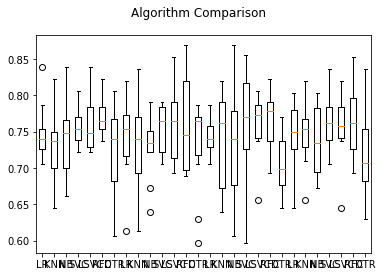

In [ ]:
# boxplot algorithm comparison
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Ο πιο αποδοτικός αλγόριθμος για αυτό το σύνολο δεδομένων είναι ο Random Forest Classifier. Οι προεπιλεγμένες παράμετροι για έναν αλγόριθμο είναι σπάνια οι καλύτερες για το σύνολο των δεδομένων μας. 

Χρησιμοποιώντας το sklearn μπορούμε εύκολα να δημιουργήσουμε ένα πλέγμα παραμέτρων και να δοκιμάσουμε όλους τους πιθανούς συνδυασμούς. 

Η εκπαίδευση ενός μοντέλου μηχανικής μάθησης για την επίλυση ενός προβλήματος με ένα συγκεκριμένο σύνολο δεδομένων είναι μια διαδικασία δοκιμής / αποτυχίας / βελτίωσης.